# KNeighbors Regression using Zomato Dataset

The data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables*** :

- ***Restaurant Id*** : Unique id of every restaurant across various cities of the world
- ***Restaurant Name*** : Name of the restaurant
- ***Country Code*** : Country in which restaurant is located
- ***City*** : City in which restaurant is located
- ***Address*** : Address of the restaurant
- ***Locality*** : Location in the city
- ***Locality Verbose*** : Detailed description of the locality
- ***Longitude*** : Longitude coordinate of the restaurant's location
- ***Latitude*** : Latitude coordinate of the restaurant's location
- ***Cuisines*** : Cuisines offered by the restaurant
- ***Average Cost for two*** : Cost for two people in different currencies
- ***Currency*** : Currency of the country
- ***Has Table booking*** : yes/no
- ***Has Online delivery*** : yes/ no
- ***Is delivering*** : yes/ no
- ***Switch to order menu*** : yes/no
- ***Price range*** : range of price of food
- ***Aggregate Rating*** : Average rating out of 5
- ***Rating color*** : depending upon the average rating color
- ***Rating text*** : text on the basis of rating of rating
- ***Votes*** : Number of ratings casted by people

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("Zomato_dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [11]:
df.shape

(9551, 22)

The Dataset contains 9551 rows and 21 columns are there in the dataset

# Checking for the data types

In [12]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [13]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Above is the Quick view of the dataset

# Grouping data according to cuisines

In [14]:
df1=df.groupby(["Cuisines"])

In [15]:
df1.mean()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Cuisines,,,,,,,,
Afghani,13898683.75,1.0,77.145669,28.507631,512.5,1.75,0.725,9.75
"Afghani, Mughlai, Chinese",18355119.00,1.0,77.245796,28.558387,500.0,2.00,0.000,2.00
"Afghani, North Indian",18435789.00,1.0,77.045289,28.439285,900.0,2.00,0.000,0.00
"Afghani, North Indian, Pakistani, Arabian",301675.00,1.0,77.266754,28.659755,500.0,2.00,0.000,3.00
African,75027.00,189.0,28.236047,-25.770748,450.0,4.00,4.700,373.00
...,...,...,...,...,...,...,...,...
"Western, Asian, Cafe",18391256.00,94.0,106.911335,-6.163948,250000.0,3.00,4.200,259.00
"Western, Fusion, Fast Food",18479742.00,184.0,103.858430,1.301707,60.0,4.00,3.200,32.00
World Cuisine,6004011.00,208.0,32.869800,39.898239,80.0,3.00,4.900,95.00


# Grouping according to City

In [16]:
df2=df.groupby(["City"])
df2.mean()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
City,,,,,,,,
Abu Dhabi,8.210826e+06,214.0,54.405998,24.464269,182.000000,3.300000,4.300000,302.250000
Agra,3.400166e+06,1.0,54.622830,19.016683,1065.000000,2.650000,3.965000,103.100000
Ahmedabad,7.064363e+06,1.0,72.531324,23.036910,857.142857,2.571429,4.161905,584.095238
Albany,1.728425e+07,216.0,-84.186592,31.602963,19.750000,1.700000,3.555000,83.800000
Allahabad,3.974018e+06,1.0,61.378793,19.089371,517.500000,2.650000,3.395000,69.600000
...,...,...,...,...,...,...,...,...
Weirton,1.769406e+07,216.0,-80.529488,40.396043,25.000000,2.000000,3.900000,156.000000
Wellington City,7.100704e+06,148.0,174.778100,-41.293814,71.250000,3.250000,4.250000,146.300000
Winchester Bay,1.755979e+07,216.0,-124.175346,43.678998,25.000000,2.000000,3.200000,16.000000


In [17]:
# Counting vlaue count of each city
df3=df["City"].value_counts()
df3

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxton            1
Chatham-Kent       1
Name: City, Length: 141, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

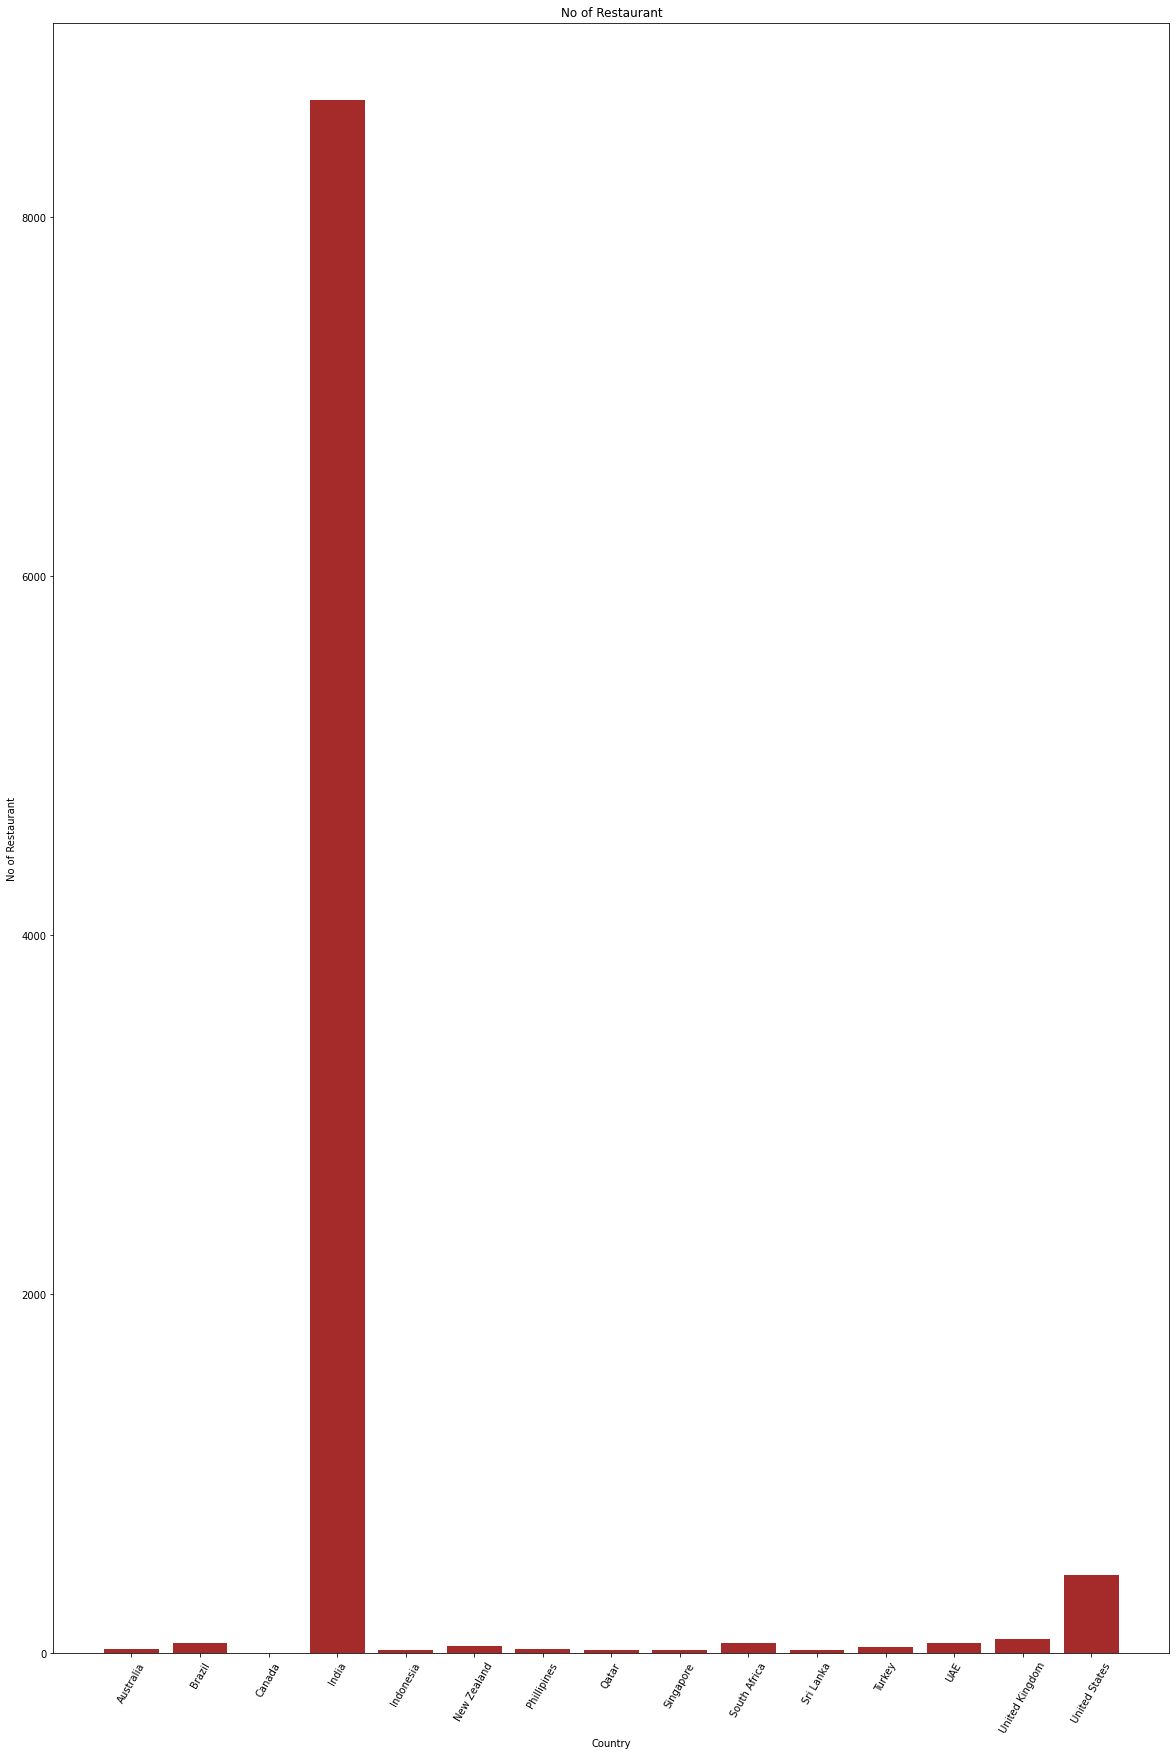

In [18]:
data_country = df.groupby(['Country'], as_index=False).count()[['Country', 'Restaurant ID']]
data_country.head()
data_country.columns = ['Country', 'No of Restaurant']
plt.figure(figsize=(20,30))
plt.bar(data_country['Country'], data_country['No of Restaurant'],color="brown")
plt.xlabel('Country')
plt.ylabel('No of Restaurant')
plt.title('No of Restaurant')
plt.xticks(rotation = 60)

### Inference
- Indian city has maximum number of Zomato restaurants
- Zomato has its presence in 23 countries but the most important country is India

# So, we should focus on India because of the above reasons

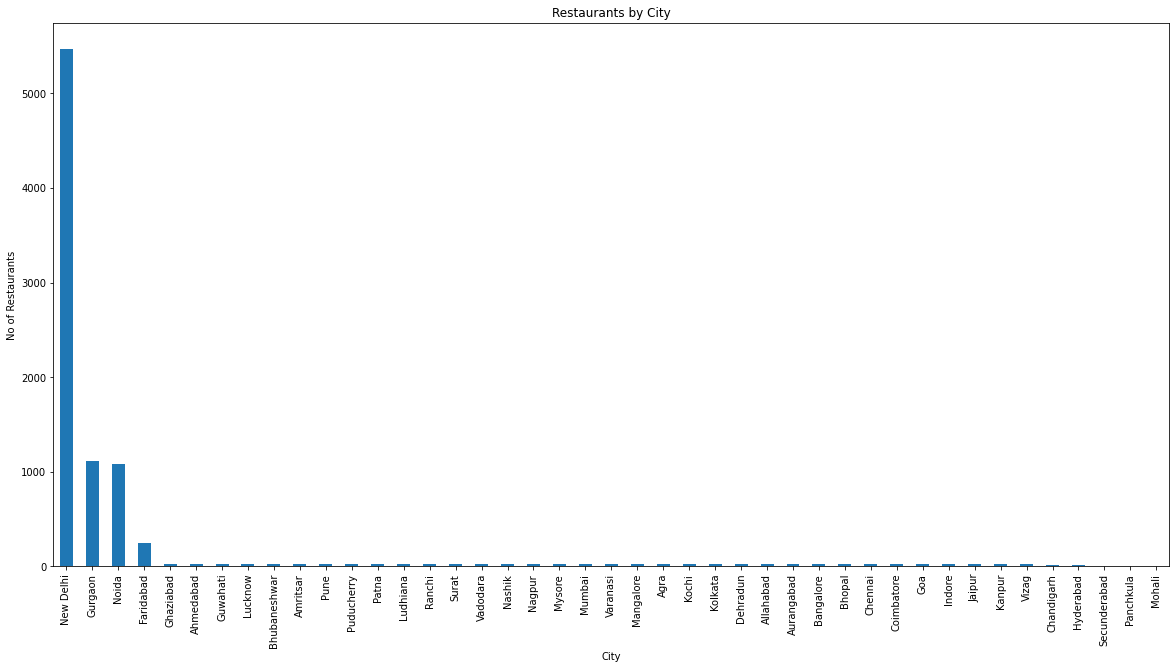

In [19]:
data_City = df[df['Country'] =='India']
Total_city =data_City['City'].value_counts()
Total_city.plot.bar(figsize=(20,10))
plt.title('Restaurants by City')                                             
plt.xlabel('City')
plt.ylabel('No of Restaurants')
plt.show()

### Inference
- New Delhi has the highest number of restaraunts associated with Zomato with a count of more than 5000.
- Gurgaon and Noida are behind New Delhi with count of more than 1000 restaurants associated with Zomato

C:\Users\Testbook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


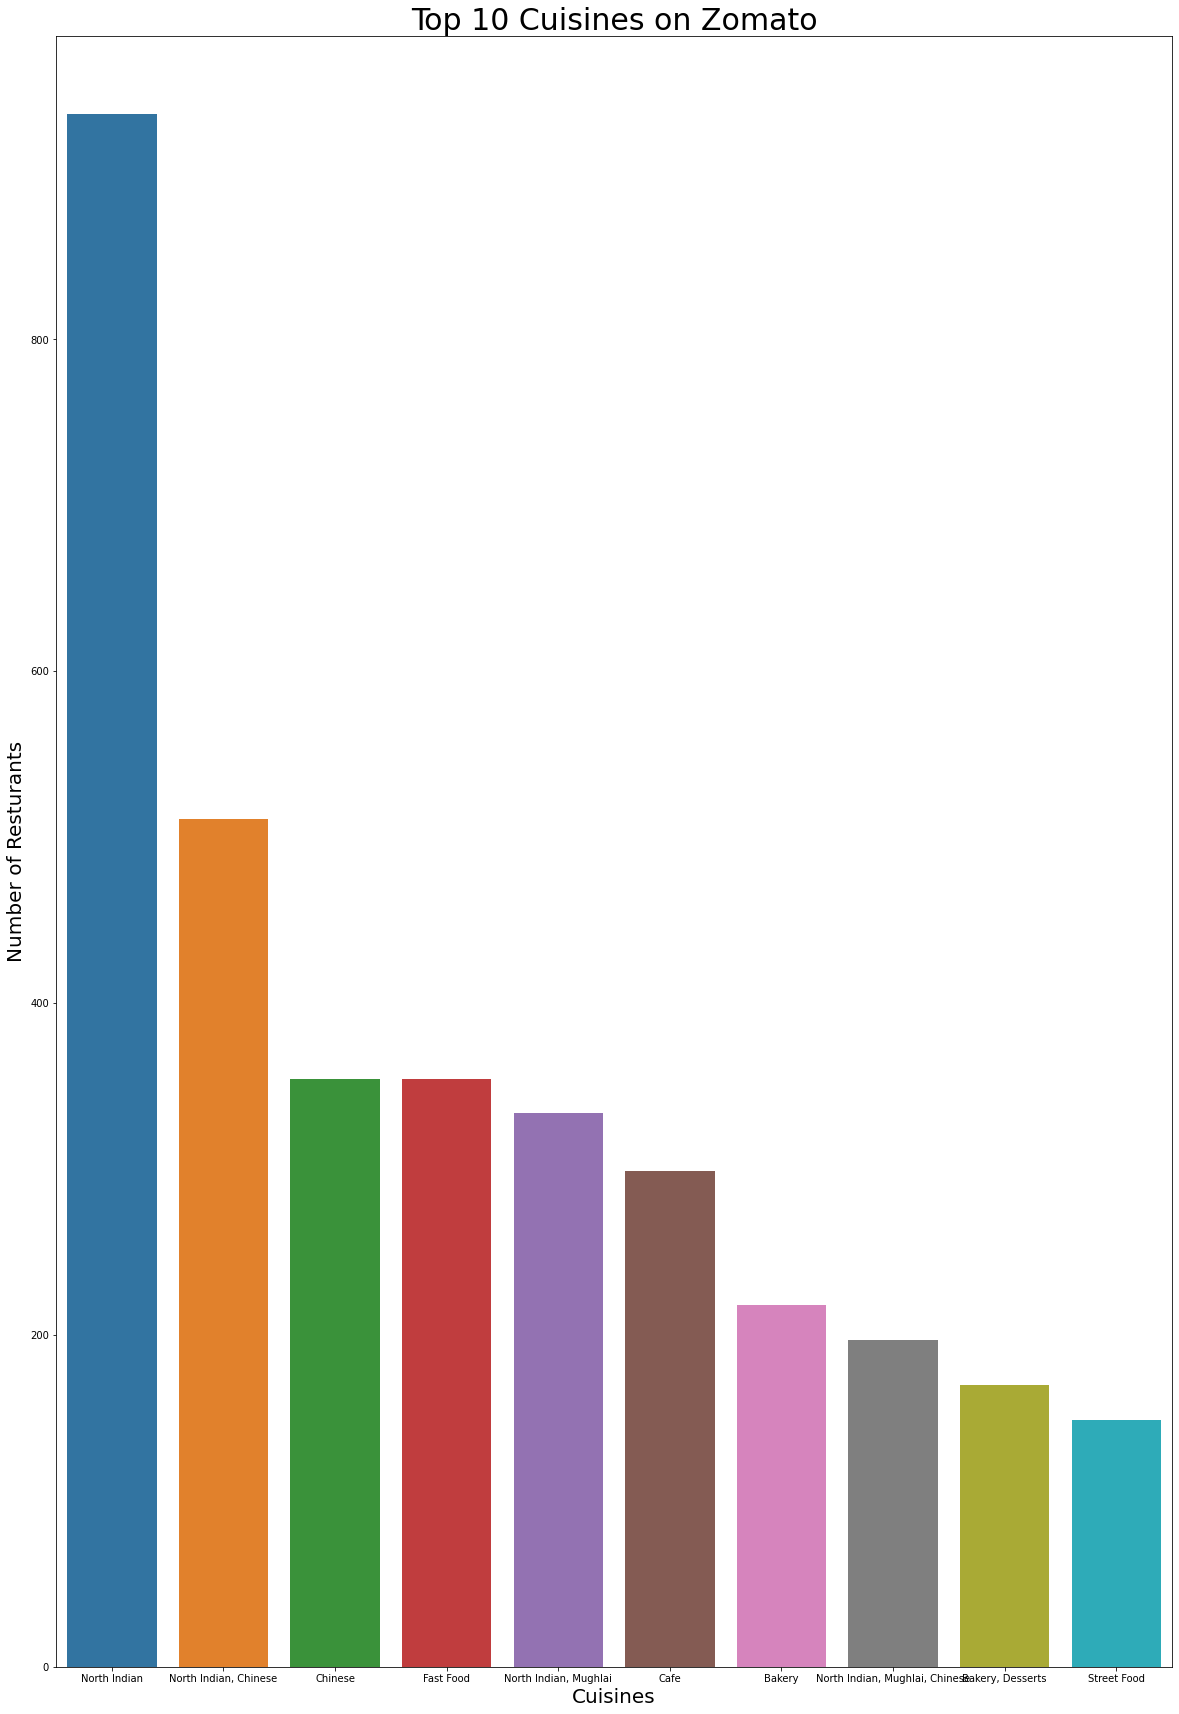

In [20]:
Cuisine_data =df.groupby(['Cuisines'], as_index=False)['Restaurant ID'].count()
Cuisine_data.columns = ['Cuisines', 'Number of Resturants']
Top10= (Cuisine_data.sort_values(['Number of Resturants'],ascending=False)).head(10)
plt.figure(figsize=(20,30))
sns.barplot(Top10['Cuisines'], Top10['Number of Resturants'])
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 10 Cuisines on Zomato', fontsize=30)
plt.show()

### Inference
- Restaurants providing only North-Indian cuisines are the highest in number with count of approximate 850
- Restaurants providing both Chinese and North Indian and restaurants providing only Chinese are behind the resturants providing both North-Indianwith a count of approx 450 and 380 respectively.

In [21]:
dummy_cuisines=pd.get_dummies(df["Has Online delivery"])
df4=dummy_cuisines.sum()


Text(0, 0.5, 'Count of restaurants')

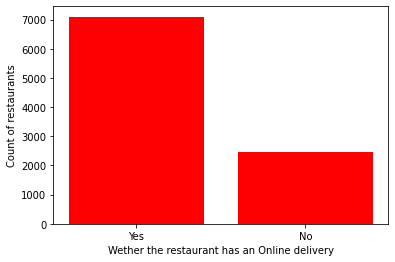

In [22]:
x=["Yes","No"]
plt.bar(x,df4,color="red")
plt.xlabel("Wether the restaurant has an Online delivery")
plt.ylabel("Count of restaurants")

### Results
- A bar graph presentation which shows how many restaurants provide Online Delivery.
 

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

### Table which shows the count of restaurants on the basis of Rating: Average,Excellent,Good,Not rated,Poor,Very Good in different cities.

In [24]:
pd.crosstab(df['Rating text'], df['City'])

City,Abu Dhabi,Agra,Ahmedabad,Albany,Allahabad,Amritsar,Ankara,Armidale,Athens,Auckland,...,Vernonia,Victor Harbor,Vineland Station,Vizag,Waterloo,Weirton,Wellington City,Winchester Bay,Yorkton,ÛÁstanbul
Rating text,,,,,,,,,,,,,,,,,,,,,
Average,0,1,0,7,15,5,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
Excellent,7,1,3,0,0,0,5,0,3,9,...,0,0,0,2,0,0,3,0,0,5
Good,1,9,5,13,5,12,1,1,2,1,...,0,1,0,10,19,1,1,0,0,2
Not rated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Poor,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Very Good,12,9,13,0,0,4,13,0,15,9,...,1,0,1,8,0,0,16,0,0,7


In [ ]:
# Inatallinig wordcloud
%pip install wordcloud

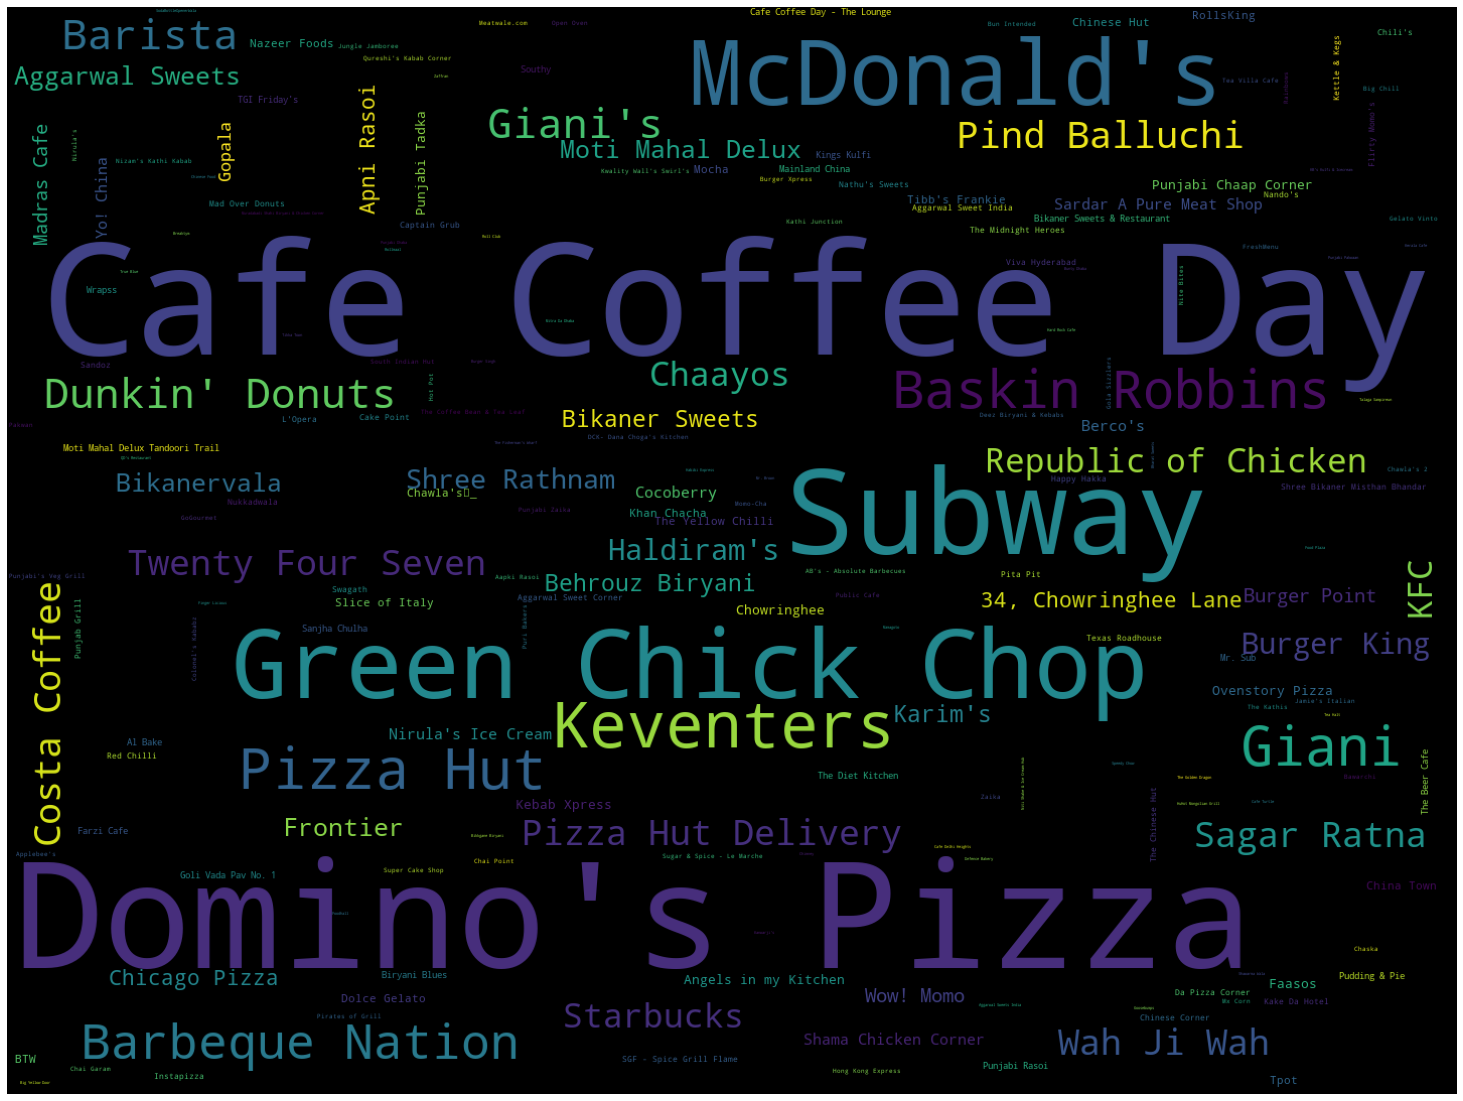

In [40]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=1, stopwords=stopwords).generate_from_frequencies(df['Restaurant Name'].value_counts()))


fig = plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Cafe Coffee Day has maximum number of restaurants associated with Zomato in INDIA followed by Domnio's Pizza and Green Chick Chop.

In [41]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Text(0, 0.5, 'Average Cost for two')

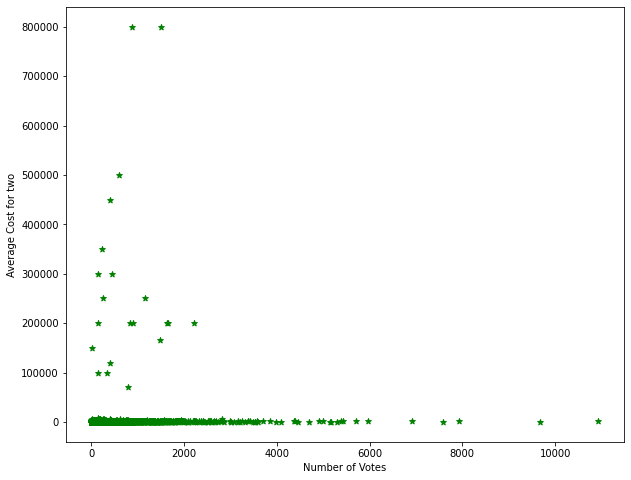

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(df["Votes"],df["Average Cost for two"],marker="*",color="green")
plt.xlabel("Number of Votes")
plt.ylabel("Average Cost for two")

From above scatter plot it is clear that there is almost no relationship between Votes(to restaraunt by its customer) and Average Cost for two.

## Correlation between various elements of the dataset

In [43]:
df.corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


<AxesSubplot:>

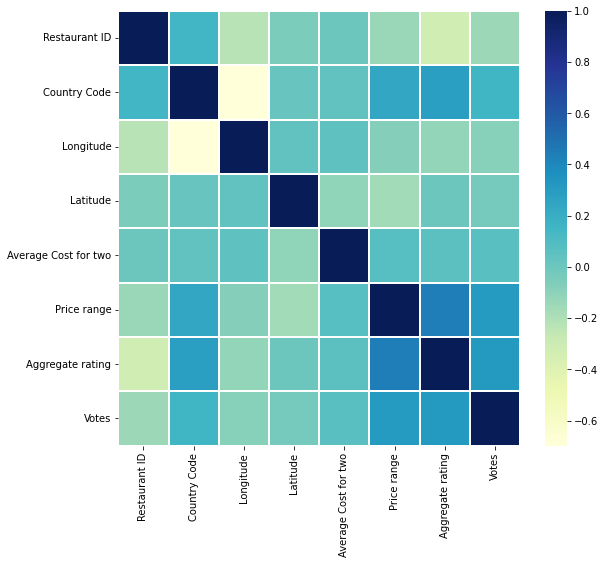

In [44]:
# Plotting Correlation using Heatmap
corrmat = df.corr() 
f,ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

# KNN Regression

### Predicting 'Average Cost for Two' using 'Currency'

Importing train_test_split method to split the dataset into training and testing for training the model and then testing it.

In [45]:
from sklearn.model_selection import train_test_split

## Using KNN for regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
x=df[['Currency']]
y=df['Average Cost for two']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
dummies=pd.get_dummies(x_train)
dummies
dummies2=pd.get_dummies(x_test)
dummies2.head()

,Currency_Botswana Pula(P),Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Indonesian Rupiah(IDR),Currency_NewZealand($),Currency_Pounds(£),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL)
4731,0,0,0,0,1,0,0,0,0,0,0,0
1468,0,0,0,0,1,0,0,0,0,0,0,0
9037,0,0,0,0,1,0,0,0,0,0,0,0
7866,0,0,0,0,1,0,0,0,0,0,0,0
5570,0,0,0,0,1,0,0,0,0,0,0,0


#### Checking Accuracy for K = 4

In [57]:
model = KNeighborsRegressor(n_neighbors = 4)
model.fit(dummies, y_train)  #fit the model
pred=model.predict(dummies2) #make prediction on test set
accuracy = r2_score(y_test, pred)
error=sqrt(mean_squared_error(y_test,pred))
print("Root Mean Squared Error is => ",error)
print("For k => ",4)
print("Accuracy is => ",accuracy*100,'%') 

Root Mean Squared Error is =>  12972.370352356818
For k =>  4
Accuracy is =>  55.84688716839605 %


#### Checking Accuracy for K = 2

In [61]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(dummies, y_train)  #fit the model
pred=model.predict(dummies2) #make prediction on test set
accuracy = r2_score(y_test, pred)
error=sqrt(mean_squared_error(y_test,pred))
print("Root Mean Squared Error is => ",error)
print("For k => ",2)
print("Accuracy is => ",accuracy*100,'%') 

Root Mean Squared Error is =>  15396.429849783659
For k =>  2
Accuracy is =>  37.80396428396294 %


#### Checking Accuracy for K = 13

In [60]:
model = KNeighborsRegressor(n_neighbors = 13)
model.fit(dummies, y_train)  #fit the model
pred=model.predict(dummies2) #make prediction on test set
accuracy = r2_score(y_test, pred)
error=sqrt(mean_squared_error(y_test,pred))
print("Root Mean Squared Error is => ",error)
print("For k => ",13)
print("Accuracy is => ",accuracy*100,'%') 

Root Mean Squared Error is =>  12884.727785279947
For k =>  13
Accuracy is =>  56.44147706126063 %


#### Checking Accuracy for K = 15

In [59]:
model = KNeighborsRegressor(n_neighbors = 15)
model.fit(dummies, y_train)  #fit the model
pred=model.predict(dummies2) #make prediction on test set
accuracy = r2_score(y_test, pred)
error=sqrt(mean_squared_error(y_test,pred))
print("Root Mean Squared Error is => ",error)
print("For k => ",15)
print("Accuracy is => ",accuracy*100,'%') 

Root Mean Squared Error is =>  12887.09180982064
For k =>  15
Accuracy is =>  56.42549180097107 %


## From above we can conclude that K = 13 has best accuracy among the various K value we have considered 